### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum() #12684 rolls of data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
dataframe = data.drop(columns=['car'])

In [6]:
dataframe = dataframe.dropna(subset = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [7]:
percentage_of_data = dataframe.shape[0]/data.shape[0]
percentage_of_data # 95% of the data still in the dataframe

0.9523021128981394

4. What proportion of the total observations chose to accept the coupon?



In [8]:
proportion = dataframe['Y'].sum()/dataframe.shape[0]

In [9]:
print('The overall acceptance rate of coupon in the given dataframe is \n'+f"{proportion:.2%}")

The overall acceptance rate of coupon in the given dataframe is 
56.93%


5. Use a bar plot to visualize the `coupon` column.

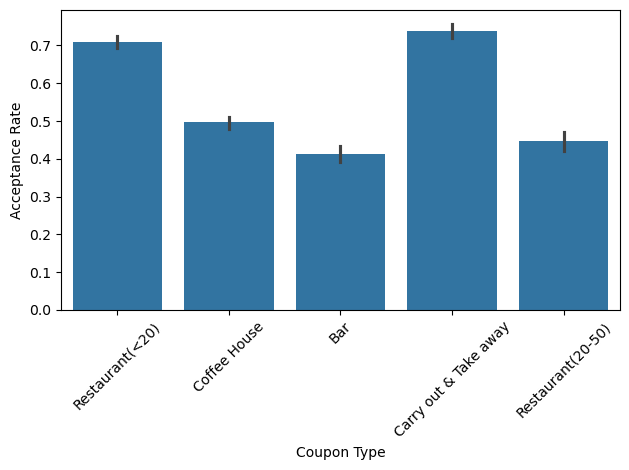

In [10]:
sns.barplot(dataframe,x='coupon', y = 'Y')#y_axis is the mean value of the Y column for each type of couple
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')
plt.xlabel('Coupon Type')
plt.tight_layout()

6. Use a histogram to visualize the temperature column.

(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

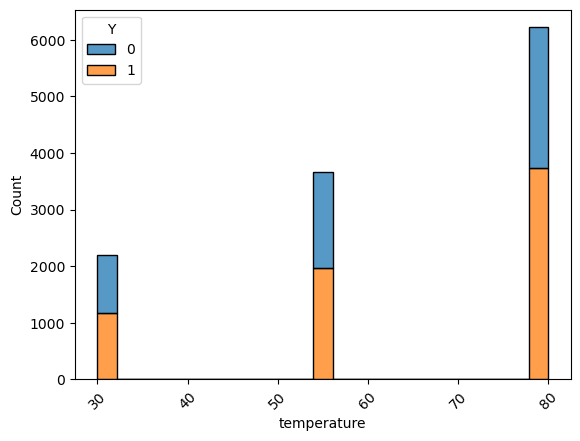

In [11]:
sns.histplot(data = dataframe, x = 'temperature',hue = 'Y',multiple='stack')
plt.xticks(rotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_dataframe = dataframe[dataframe['coupon'] == 'Bar']
bar_dataframe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [13]:
accptance_bar_rate = bar_dataframe['Y'].mean()
print('The acceptance rate of bar coupon in the given dataframe is ' + f"{accptance_bar_rate:.2%}") # the acceptance rate for bar couple is caluclated 41.19%

The acceptance rate of bar coupon in the given dataframe is 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
list_bar_3_less = ['never','less1','1~3']
list_bar_3_more = ['gt8','4~8']
bar_dataframe_3_less = bar_dataframe.query("Bar in@list_bar_3_less")
bar_dataframe_3_more = bar_dataframe.query("Bar in@list_bar_3_more")
accptance_bar_rate_3_less = bar_dataframe_3_less['Y'].mean()
accptance_bar_rate_3_more = bar_dataframe_3_more['Y'].mean()

print('The acceptance rate of bar coupon in the given dataframe is:\n' 
      + f"{accptance_bar_rate_3_less:.2%}" +' for people who went to a bar 3 or fewer;\n'
     +f"{accptance_bar_rate_3_more:.2%}" +' for people who went more;\n'
+'The results indicate people who went bar more than 3 times have a higher acceptance rate on bar coupoun')

The acceptance rate of bar coupon in the given dataframe is:
37.27% for people who went to a bar 3 or fewer;
76.17% for people who went more;
The results indicate people who went bar more than 3 times have a higher acceptance rate on bar coupoun


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
list_bar_1_more = ['1~3','gt8','4~8']
bar_dataframe_1_more = bar_dataframe.query("Bar in@list_bar_1_more").copy()
bar_dataframe_1_more.loc[bar_dataframe_1_more['age'] == '50plus', 'age'] = 51 # using 51 to represent the group of people older than 50
bar_dataframe_1_more.loc[bar_dataframe_1_more['age'] == 'below21', 'age'] = 20 # using 20 to represent the group of people younger than 21
bar_dataframe_1_more['age'] = pd.to_numeric(bar_dataframe_1_more['age'])
bar_dataframe_1_more_age_over_25 = bar_dataframe_1_more[bar_dataframe_1_more['age']>25]
accptance_bar_rate_1_more_25_older = bar_dataframe_1_more_age_over_25['Y'].mean()
print('In comparison to the overall bar coupoun acceptance rate ('+f"{accptance_bar_rate:.2%}"+'), the acceptance rate between drivers \nwho go to a bar more than once a month and are over the age of 25  is obviously higher, '+f"{accptance_bar_rate_1_more_25_older:.2%}")

In comparison to the overall bar coupoun acceptance rate (41.19%), the acceptance rate between drivers 
who go to a bar more than once a month and are over the age of 25  is obviously higher, 68.98%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
bar_dataframe_1_more_no_kids = bar_dataframe_1_more[bar_dataframe_1_more['passanger']!='Kid(s)'] # passengers were not kid
list_occupations = ['farming','fishing','forestry']
bar_dataframe_1_more_no_kids_certain_occupations = bar_dataframe_1_more_no_kids.query("occupation not in@list_occupations")
accptance_bar_rate_1_more_no_kid_certain_occupations = bar_dataframe_1_more_no_kids_certain_occupations['Y'].mean()
print('The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is '+f"{accptance_bar_rate_1_more_no_kid_certain_occupations:.2%}")

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 70.94%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
bar_dataframe_1_more_no_kids_not_widowed = bar_dataframe_1_more_no_kids[bar_dataframe_1_more_no_kids['maritalStatus']!='widowed']
acceptance_rate_bar_dataframe_1_more_no_kids_not_widowed = bar_dataframe_1_more_no_kids_not_widowed['Y'].mean()

In [18]:
# go to bars more than once a month and are under the age of 30
bar_dataframe_1_more_under_30 = bar_dataframe_1_more[bar_dataframe_1_more['age']<30]
acceptance_rate_bar_dataframe_1_more_under_30 = bar_dataframe_1_more_under_30['Y'].mean()

In [19]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
list_cheap_restaurant = ['4~8','gt8']
list_income = ['$12500 - $24999','$37500 - $49999','$25000 - $37499','Less than $12500']
bar_dataframe_cheap_restaturant = bar_dataframe.query("RestaurantLessThan20 in@list_cheap_restaurant")
bar_dataframe_cheap_restaturant_income = bar_dataframe_cheap_restaturant.query("income in@list_income")
acceptance_rate_bar_dataframe_cheap_restaturant_income=bar_dataframe_cheap_restaturant_income['Y'].mean()

In [20]:
print('The acceptance rate of the bar coupoun for the people who:\n'+
     '- go to bars more than once a month, had passengers that were not a kid, and were not widowed is '+f"{acceptance_rate_bar_dataframe_1_more_no_kids_not_widowed:.2%}"
     +'\n- go to bars more than once a month and are under the age of 30 is '+f"{acceptance_rate_bar_dataframe_1_more_under_30:.2%}"
     +'\n- go to cheap restaurants more than 4 times a month and income is less than 50K is '+f"{acceptance_rate_bar_dataframe_cheap_restaturant_income:.2%}")

The acceptance rate of the bar coupoun for the people who:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed is 70.94%
- go to bars more than once a month and are under the age of 30 is 71.95%
- go to cheap restaurants more than 4 times a month and income is less than 50K is 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [21]:
print('According to the investigation from the section, the driver who:\n'+
     '- goes to a bar regularly;\n'+
     '- passengers were not a kid;\n'+
     '- not a widowed;\n'+
     '- income higher than 50K;\n'+
     'is more likely to accept and use bar coupoun')

According to the investigation from the section, the driver who:
- goes to a bar regularly;
- passengers were not a kid;
- not a widowed;
- income higher than 50K;
is more likely to accept and use bar coupoun


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

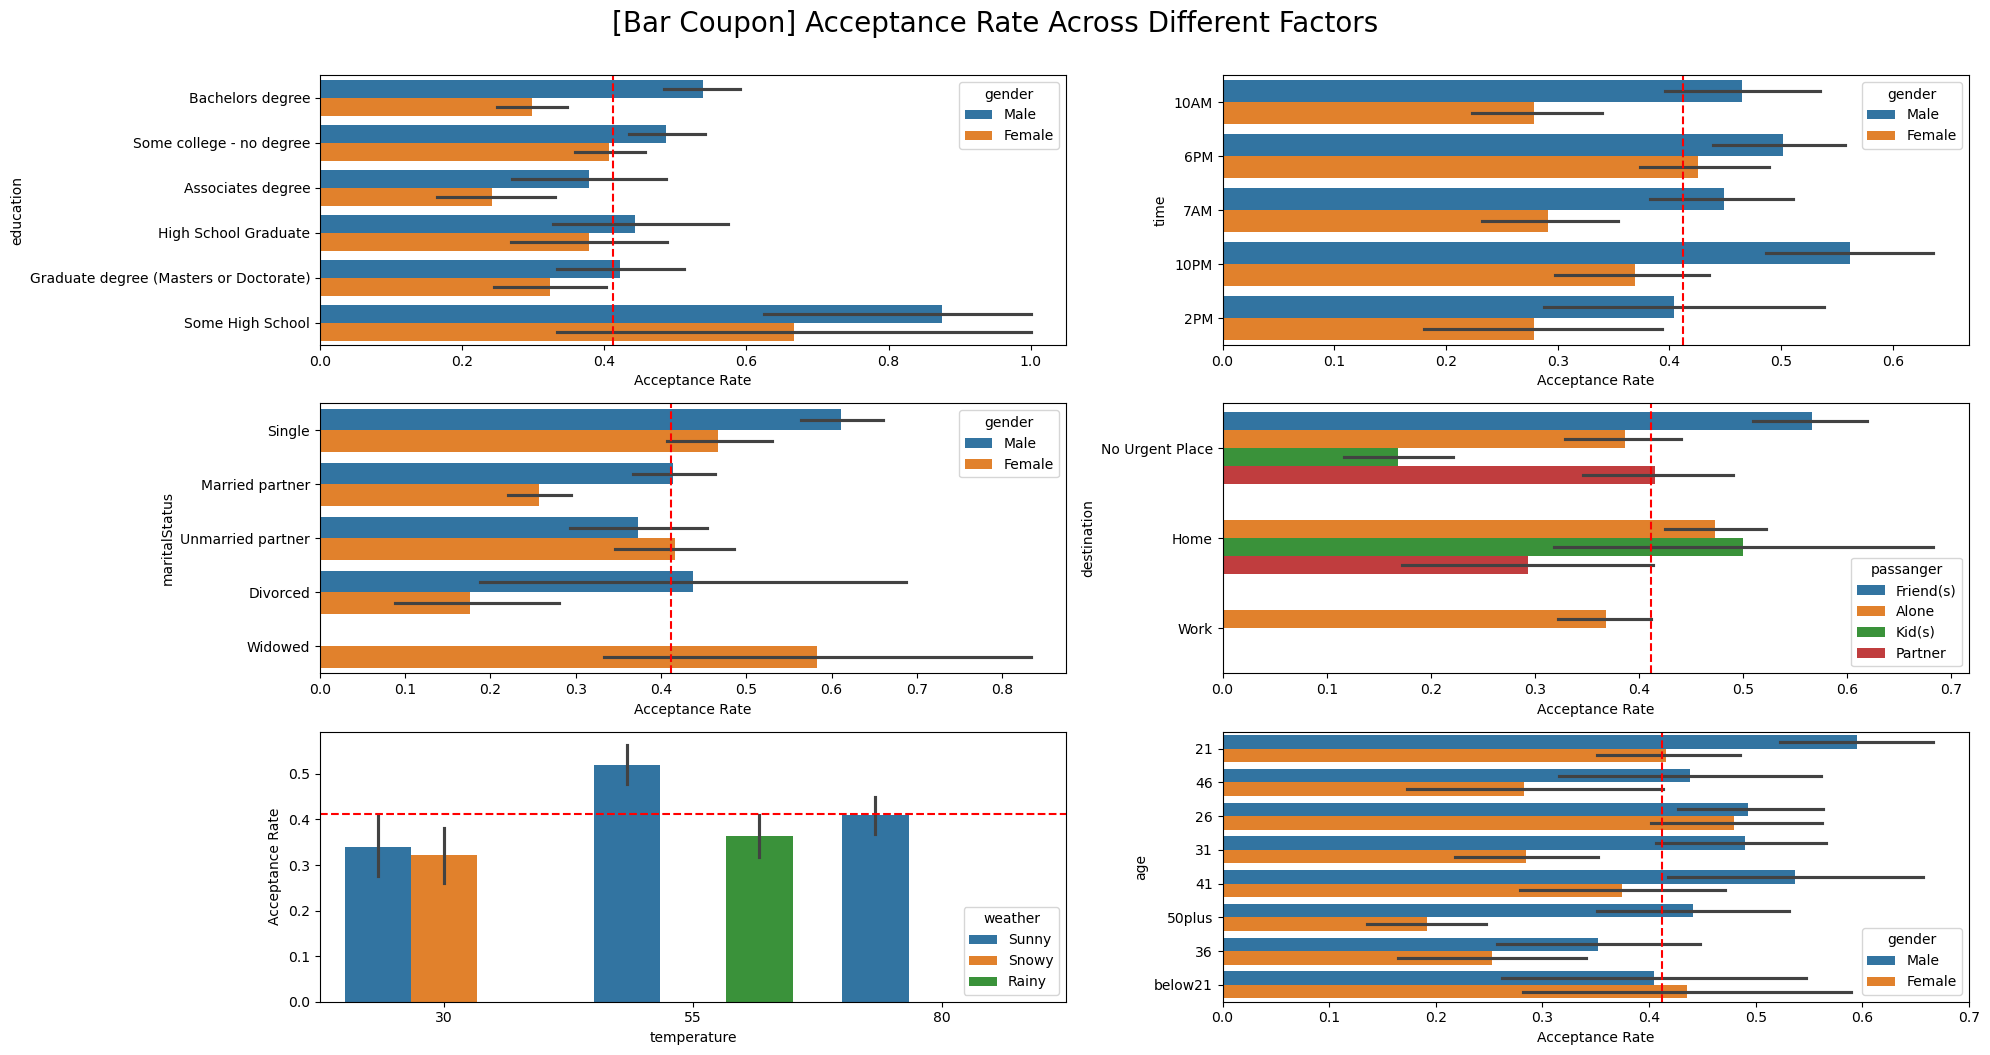

In [22]:
fig, axes = plt.subplots(3,2, figsize=(20, 10))
sns.barplot(dataframe[dataframe['coupon']=='Bar'],y='education', x = 'Y',hue = 'gender',ax=axes[0,0])#y_axis is the mean value of the Y column for each type of couple
axes[0,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Bar'],y='time', x = 'Y',hue = 'gender',ax=axes[0,1])
axes[0,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Bar'],y='maritalStatus', x = 'Y',hue='gender',ax=axes[1,0])
axes[1,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Bar'],y='destination', x = 'Y',hue='passanger',ax=axes[1,1])
axes[1,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Bar'],x='temperature',hue='weather', y = 'Y',ax=axes[2,0])
axes[2,0].axhline(
    y=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,0].set_ylabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Bar'],y='age', x = 'Y',hue='gender',ax=axes[2,1])
axes[2,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Bar']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,1].set_xlabel('Acceptance Rate')
plt.tight_layout()
fig.suptitle('[Bar Coupon] Acceptance Rate Across Different Factors', y =1.05,fontsize = 20)
plt.show()

In [23]:
dataframe_for_bar = dataframe[(dataframe['coupon'] == 'Bar')&(dataframe['time'] == '10PM')]
dataframe_for_bar = dataframe_for_bar[(dataframe_for_bar['passanger'] == 'Friend(s)')&(dataframe_for_bar['destination'] == 'No Urgent Place')]
dataframe_for_bar = dataframe_for_bar[(dataframe_for_bar['weather'] == 'Sunny')&(dataframe_for_bar['gender'] == 'Male')]
dataframe_for_bar = dataframe_for_bar[(dataframe_for_bar['maritalStatus'] == 'Single')]
sample_for_bar = dataframe_for_bar['Y'].mean()
print('According to the bar plots, we observed that if drivers meet the conditions:\n'
     +'- Only have some high school education or\n'
     +'- is Male or\n'
     +'- drive with Friends and no urgent place or\n'
     +'- Age around 21 or\n'
     +'- in a Sunny date with 55 F degree\n'
     +'is more likely to accpet the [bar coupon] than average acceptance rate (' + f"{dataframe[dataframe['coupon'] == 'Bar']['Y'].mean():.2%}" +')\n'
     + 'The sample we picked(10PM,Friend(s),Male,No Urgent Place,Single,Sunny) gives us an acceptance rate of ' + f"{sample_for_bar:.2%}" +'.')

According to the bar plots, we observed that if drivers meet the conditions:
- Only have some high school education or
- is Male or
- drive with Friends and no urgent place or
- Age around 21 or
- in a Sunny date with 55 F degree
is more likely to accpet the [bar coupon] than average acceptance rate (41.19%)
The sample we picked(10PM,Friend(s),Male,No Urgent Place,Single,Sunny) gives us an acceptance rate of 78.57%.


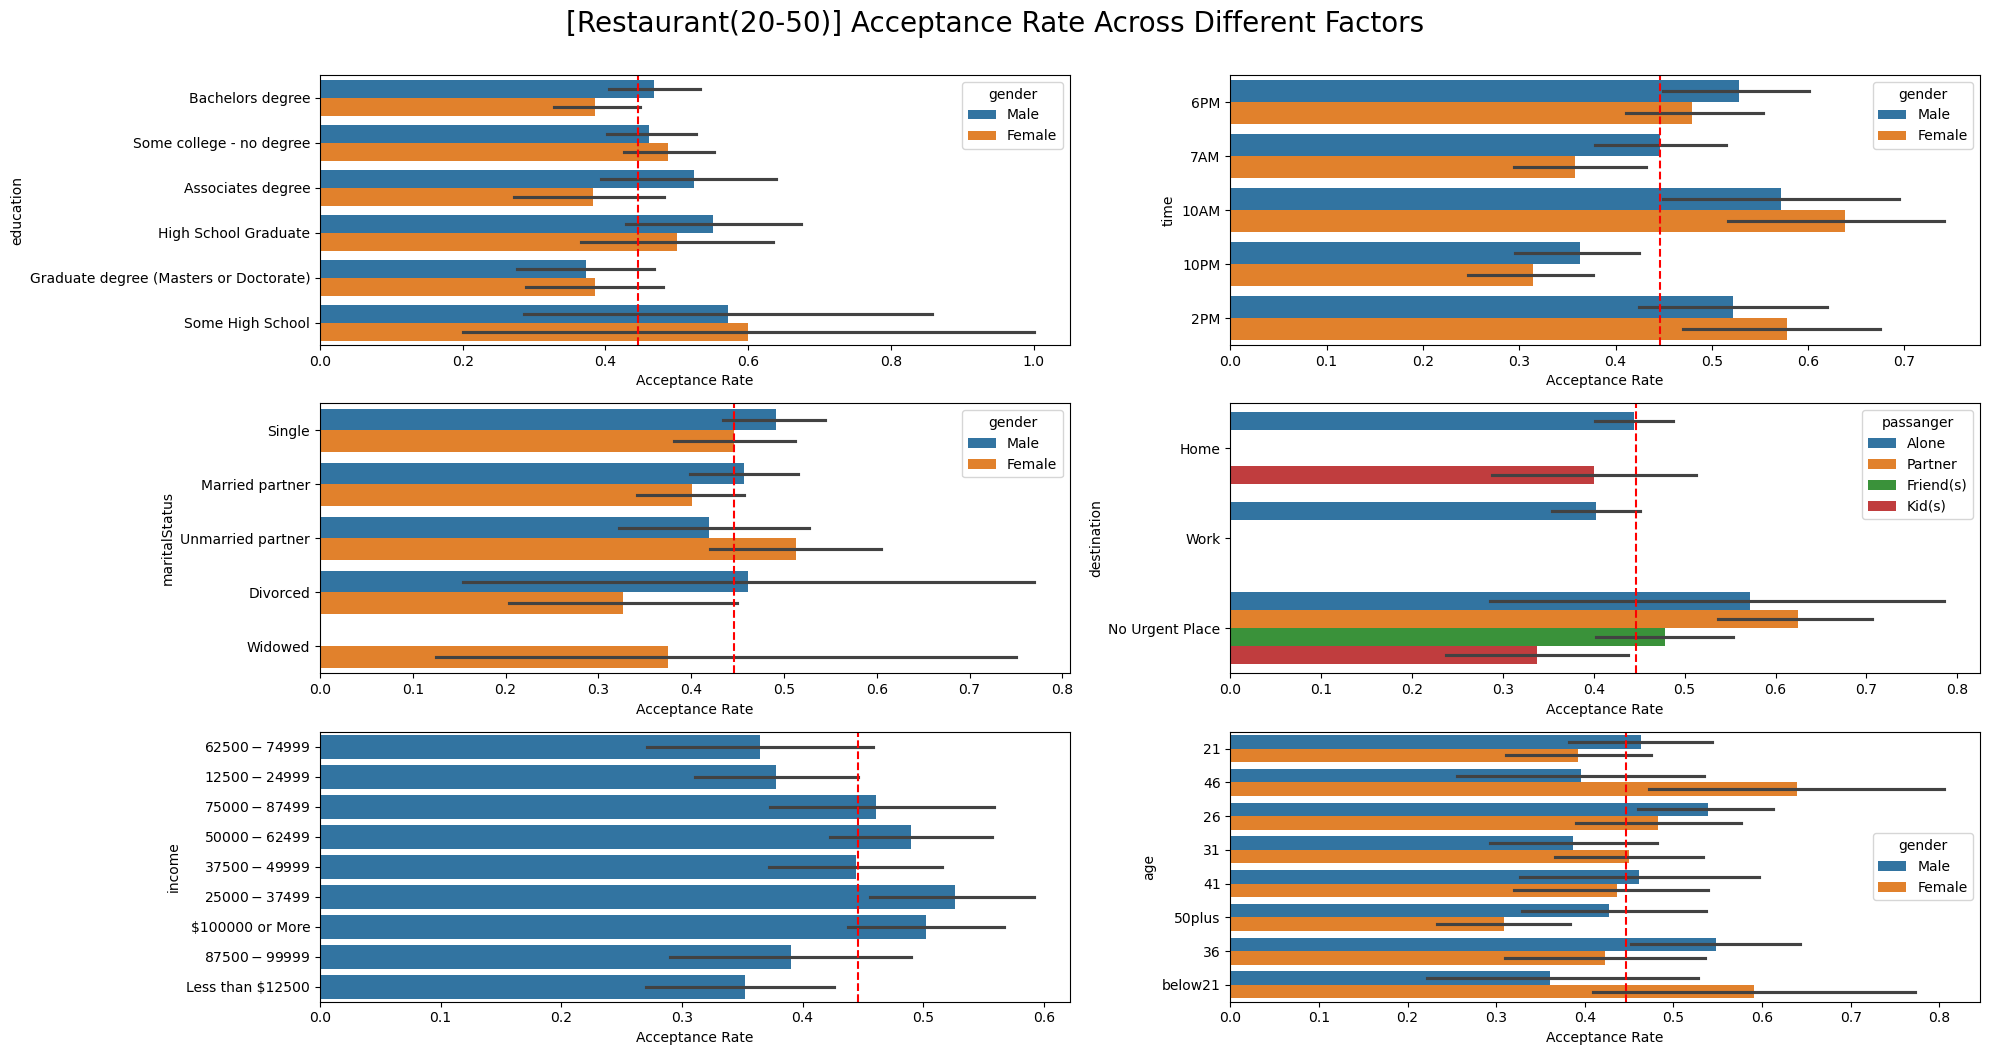

In [24]:
fig, axes = plt.subplots(3,2, figsize=(20, 10))
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='education', x = 'Y',hue = 'gender',ax=axes[0,0])#y_axis is the mean value of the Y column for each type of couple
axes[0,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='time', x = 'Y',hue = 'gender',ax=axes[0,1])
axes[0,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='maritalStatus', x = 'Y',hue='gender',ax=axes[1,0])
axes[1,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='destination', x = 'Y',hue='passanger',ax=axes[1,1])
axes[1,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='income', x = 'Y',ax=axes[2,0])
axes[2,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(20-50)'],y='age', x = 'Y',hue='gender',ax=axes[2,1])
axes[2,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,1].set_xlabel('Acceptance Rate')
plt.tight_layout()
fig.suptitle('[Restaurant(20-50)] Acceptance Rate Across Different Factors', y =1.05,fontsize = 20)
plt.show()


In [25]:
dataframe_for_50_restaurant = dataframe[(dataframe['coupon'] == 'Restaurant(20-50)')&(dataframe['time'] == '10AM')]
dataframe_for_50_restaurant = dataframe_for_50_restaurant[(dataframe_for_50_restaurant['gender'] == 'Female')&(dataframe_for_50_restaurant['destination'] == 'No Urgent Place')]
dataframe_for_50_restaurant = dataframe_for_50_restaurant[(dataframe_for_50_restaurant['passanger'] == 'Partner')]
dataframe_for_50_restaurant = dataframe_for_50_restaurant[(dataframe_for_50_restaurant['maritalStatus'] == 'Unmarried partner')]
sample_for_non_cheap_restaurant=dataframe_for_50_restaurant['Y'].mean()
print('According to the bar plots, we observed that if drivers meet the conditions:\n'
     +'- Only have some high school education or\n'
     +'- is Female or\n'
     +'- drive with Partner and no urgent place or\n'
     +'- not married but has a partner or\n'
     +'- Age around 46 or\n'
     +'- time around 10AM or\n'
     +'is more likely to accpet the [Restaurant(20-50)] than average acceptance rate (' + f"{dataframe[dataframe['coupon'] == 'Restaurant(20-50)']['Y'].mean():.2%}" +')\n'
     + 'The sample we picked(10AM,Female,Partner,No Urgent Place,Unmarried partner) gives us an acceptance rate of ' + f"{sample_for_non_cheap_restaurant:.2%}" +'.')

According to the bar plots, we observed that if drivers meet the conditions:
- Only have some high school education or
- is Female or
- drive with Partner and no urgent place or
- not married but has a partner or
- Age around 46 or
- time around 10AM or
is more likely to accpet the [Restaurant(20-50)] than average acceptance rate (44.60%)
The sample we picked(10AM,Female,Partner,No Urgent Place,Unmarried partner) gives us an acceptance rate of 70.00%.


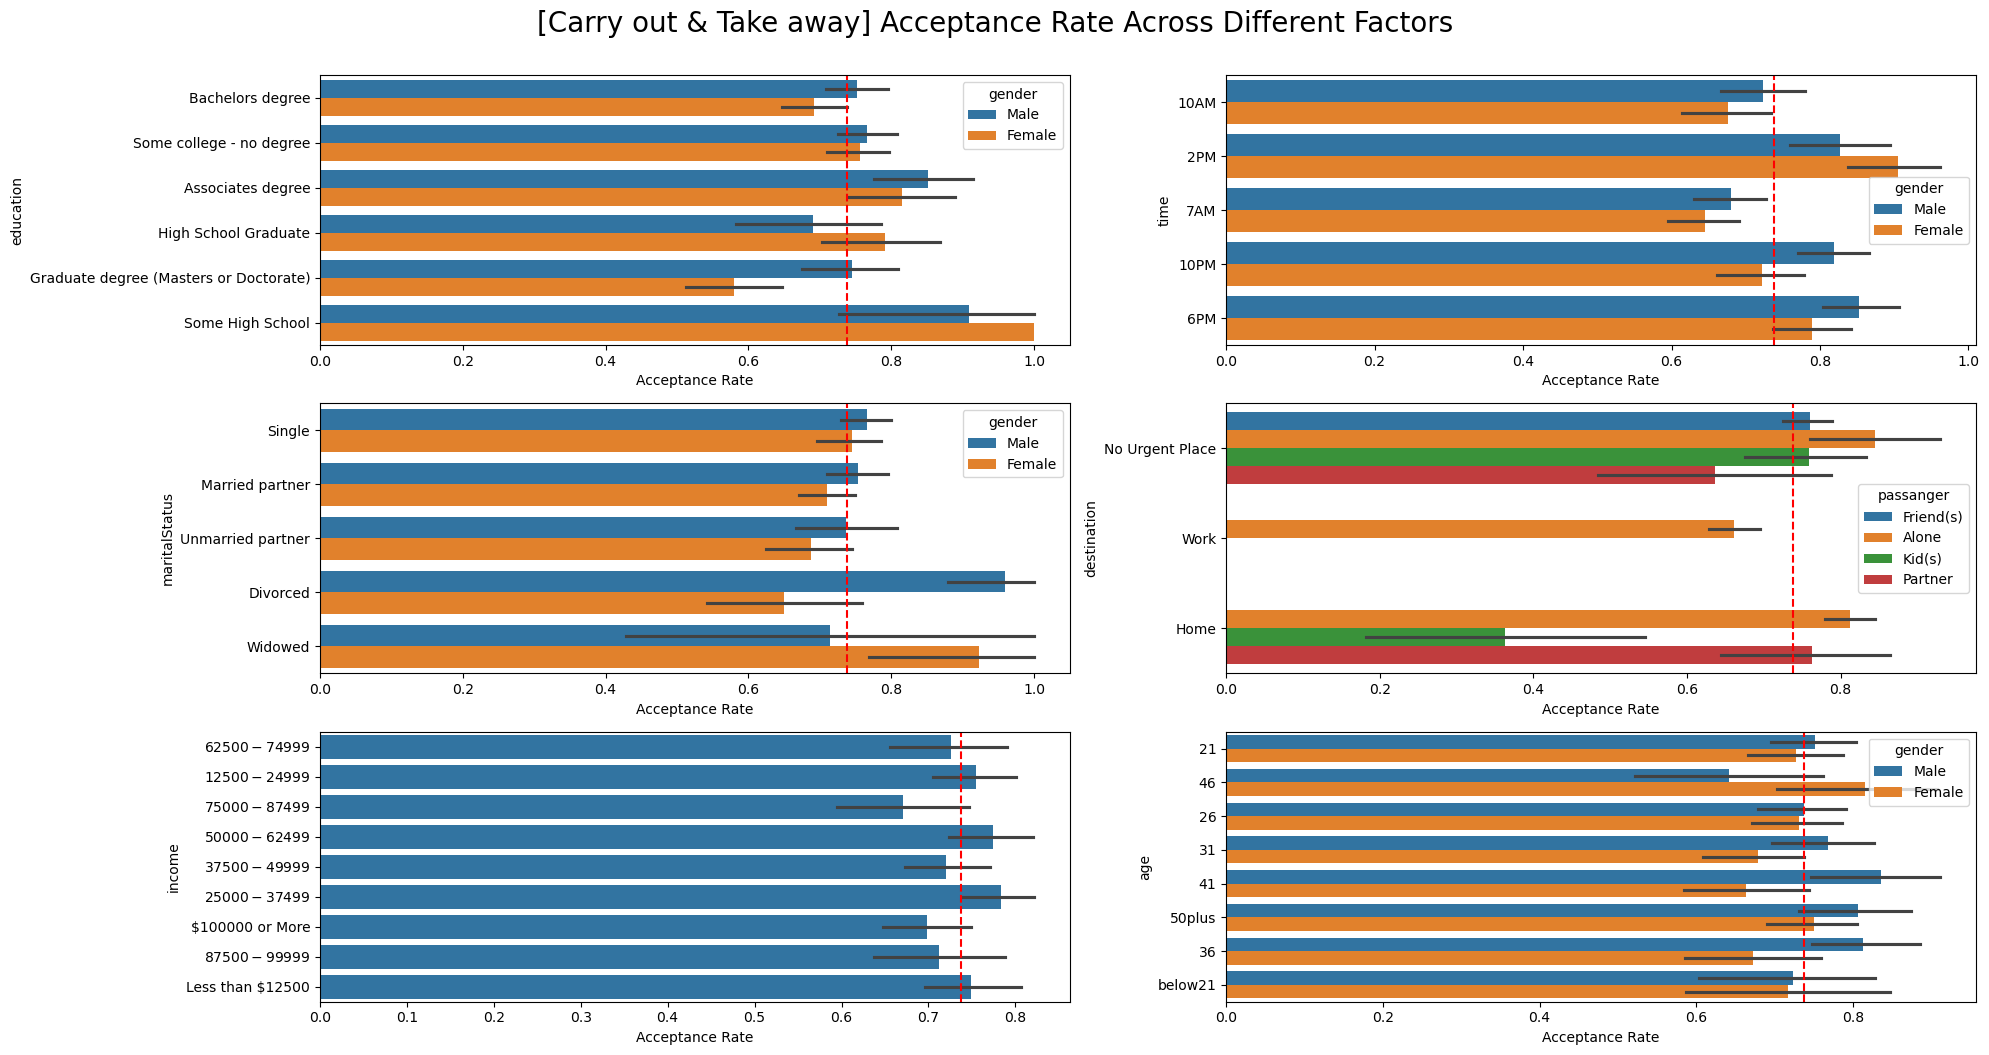

In [26]:
fig, axes = plt.subplots(3,2, figsize=(20, 10))
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='education', x = 'Y',hue = 'gender',ax=axes[0,0])#y_axis is the mean value of the Y column for each type of couple
axes[0,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='time', x = 'Y',hue = 'gender',ax=axes[0,1])
axes[0,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='maritalStatus', x = 'Y',hue='gender',ax=axes[1,0])
axes[1,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='destination', x = 'Y',hue='passanger',ax=axes[1,1])
axes[1,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='income', x = 'Y',ax=axes[2,0])
axes[2,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Carry out & Take away'],y='age', x = 'Y',hue='gender',ax=axes[2,1])
axes[2,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,1].set_xlabel('Acceptance Rate')
plt.tight_layout()
fig.suptitle('[Carry out & Take away] Acceptance Rate Across Different Factors', y =1.05,fontsize = 20)
plt.show()


In [27]:
dataframe_for_carry_out = dataframe[(dataframe['coupon'] == 'Carry out & Take away')&(dataframe['time'] == '2PM')]
dataframe_for_carry_out = dataframe_for_carry_out[dataframe_for_carry_out['destination'] == 'No Urgent Place']
sample_for_carry_out=dataframe_for_carry_out['Y'].mean()
print('According to the bar plots, we observed that if drivers meet the conditions:\n'
     +'- Only have some high school education or\n'
     +'- drive alone and no urgent place or\n'
     +'- widowed female or\n'
     +'- divorced male or\n'
     +'- time around 2pm or\n'
     +'is more likely to accpet the [Carry out & Take away] than average acceptance rate (' + f"{dataframe[dataframe['coupon'] == 'Carry out & Take away']['Y'].mean():.2%}" +')\n'
     + 'The sample we picked(2PM,No Urgent Place) gives us an acceptance rate of ' + f"{sample_for_carry_out:.2%}" +'.')

According to the bar plots, we observed that if drivers meet the conditions:
- Only have some high school education or
- drive alone and no urgent place or
- widowed female or
- divorced male or
- time around 2pm or
is more likely to accpet the [Carry out & Take away] than average acceptance rate (73.77%)
The sample we picked(2PM,No Urgent Place) gives us an acceptance rate of 86.60%.


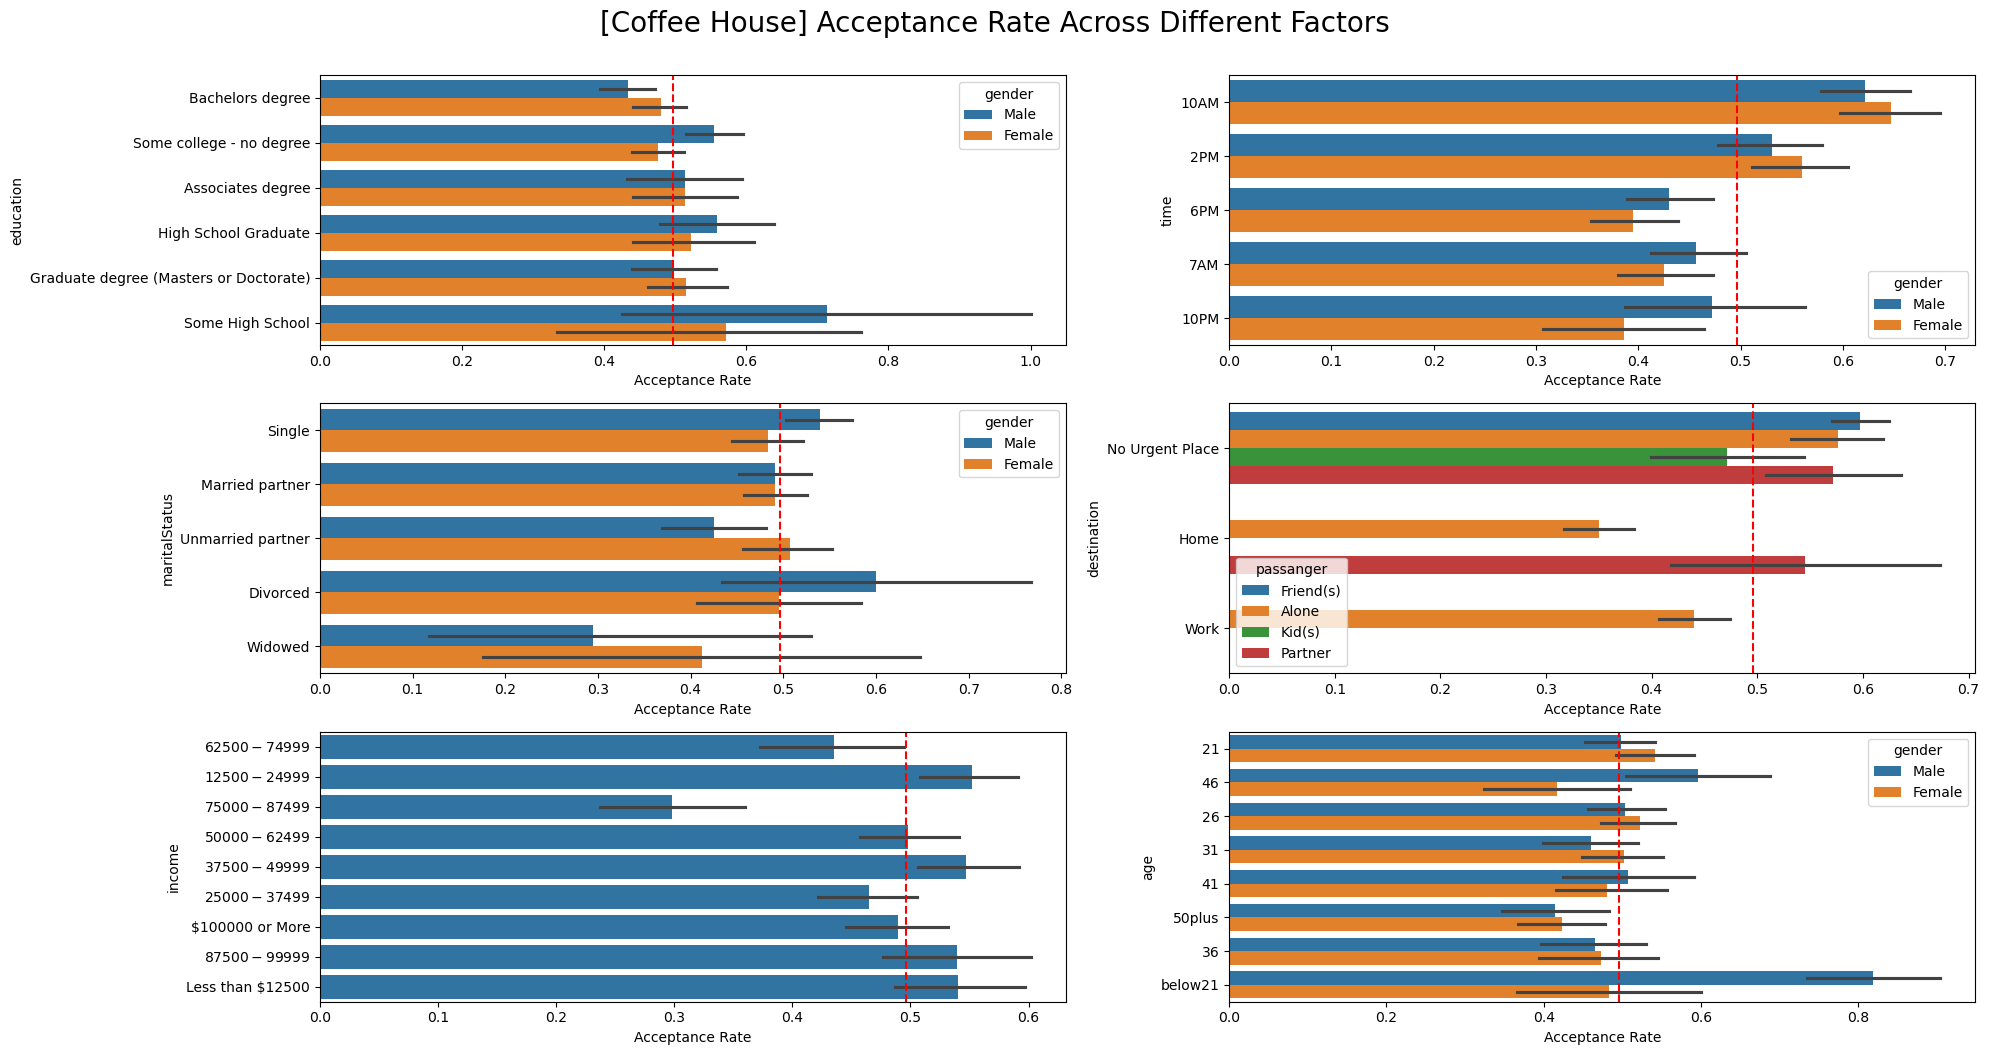

In [28]:
fig, axes = plt.subplots(3,2, figsize=(20, 10))
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='education', x = 'Y',hue = 'gender',ax=axes[0,0])#y_axis is the mean value of the Y column for each type of couple
axes[0,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='time', x = 'Y',hue = 'gender',ax=axes[0,1])
axes[0,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='maritalStatus', x = 'Y',hue='gender',ax=axes[1,0])
axes[1,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='destination', x = 'Y',hue='passanger',ax=axes[1,1])
axes[1,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='income', x = 'Y',ax=axes[2,0])
axes[2,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Coffee House'],y='age', x = 'Y',hue='gender',ax=axes[2,1])
axes[2,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,1].set_xlabel('Acceptance Rate')
plt.tight_layout()
fig.suptitle('[Coffee House] Acceptance Rate Across Different Factors', y =1.05,fontsize = 20)
plt.show()


In [29]:
dataframe_for_coffee_house = dataframe[(dataframe['coupon'] == 'Coffee House')]
dataframe_for_coffee_house = dataframe_for_coffee_house[dataframe_for_coffee_house['age'] == 'below21']
dataframe_for_coffee_house = dataframe_for_coffee_house[dataframe_for_coffee_house['gender'] == 'Male']
sample_for_coffee_house=dataframe_for_coffee_house['Y'].mean()
print('According to the bar plots, we observed that if drivers meet the conditions:\n'
     +'- Only have some high school education or\n'
     +'- drive with friends and no urgent place or\n'
     +'- single male or\n'
     +'- divorced male or\n'
     +'- time around 10am or\n'
     +'is more likely to accpet the [Coffee House] than average acceptance rate (' + f"{dataframe[dataframe['coupon'] == 'Coffee House']['Y'].mean():.2%}" +')\n'
     + 'The sample we picked(below21,Male) gives us an acceptance rate of ' + f"{sample_for_coffee_house:.2%}" +'.')

According to the bar plots, we observed that if drivers meet the conditions:
- Only have some high school education or
- drive with friends and no urgent place or
- single male or
- divorced male or
- time around 10am or
is more likely to accpet the [Coffee House] than average acceptance rate (49.63%)
The sample we picked(below21,Male) gives us an acceptance rate of 81.93%.


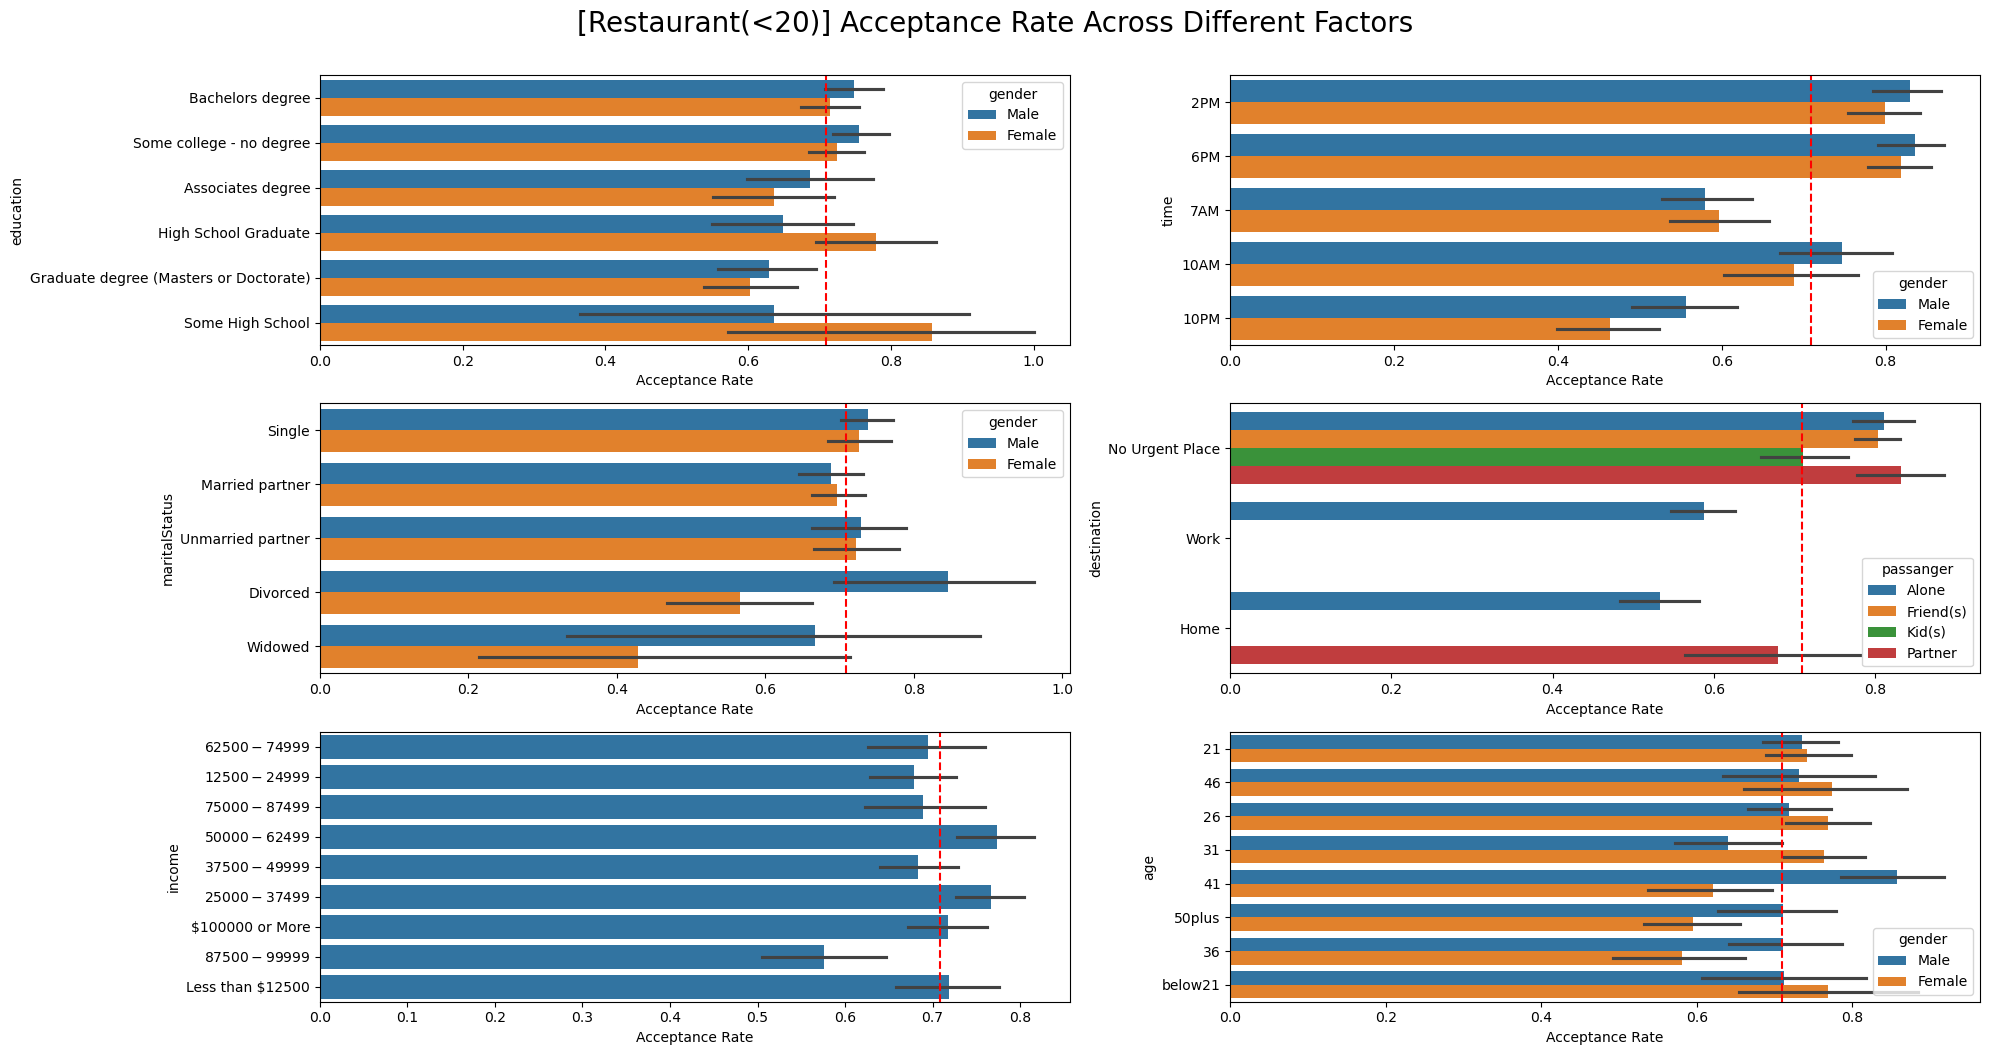

In [30]:
fig, axes = plt.subplots(3,2, figsize=(20, 10))
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='education', x = 'Y',hue = 'gender',ax=axes[0,0])#y_axis is the mean value of the Y column for each type of couple
axes[0,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='time', x = 'Y',hue = 'gender',ax=axes[0,1])
axes[0,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[0,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='maritalStatus', x = 'Y',hue='gender',ax=axes[1,0])
axes[1,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='destination', x = 'Y',hue='passanger',ax=axes[1,1])
axes[1,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[1,1].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='income', x = 'Y',ax=axes[2,0])
axes[2,0].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,0].set_xlabel('Acceptance Rate')
sns.barplot(dataframe[dataframe['coupon']=='Restaurant(<20)'],y='age', x = 'Y',hue='gender',ax=axes[2,1])
axes[2,1].axvline(
    x=dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean(),
    linestyle='--',
    color = 'red'
)
axes[2,1].set_xlabel('Acceptance Rate')
plt.tight_layout()
fig.suptitle('[Restaurant(<20)] Acceptance Rate Across Different Factors', y =1.05,fontsize = 20)
plt.show()


In [31]:
dataframe_for_cheap_restaurant = dataframe[(dataframe['coupon'] == 'Restaurant(<20)')]
dataframe_for_cheap_restaurant = dataframe_for_cheap_restaurant[dataframe_for_cheap_restaurant['time'] == '6PM']
sample_for_cheap_restaurant = dataframe_for_cheap_restaurant['Y'].mean()
print('According to the bar plots, we observed that if drivers meet the conditions:\n'
     +'- Only have some high school education female or\n'
     +'- drive with partner and no urgent place or\n'
     +'- age 41 male or\n'
     +'- divorced male or\n'
     +'- time around 2-6 pm or\n'
     +'is more likely to accpet the [Restaurant(<20)] coupon than average acceptance rate (' + f"{dataframe[dataframe['coupon'] == 'Restaurant(<20)']['Y'].mean():.2%}" +')\n'
     + 'The sample we picked(6pm) gives us an acceptance rate of ' + f"{sample_for_cheap_restaurant:.2%}" +'.')

According to the bar plots, we observed that if drivers meet the conditions:
- Only have some high school education female or
- drive with partner and no urgent place or
- age 41 male or
- divorced male or
- time around 2-6 pm or
is more likely to accpet the [Restaurant(<20)] coupon than average acceptance rate (70.90%)
The sample we picked(6pm) gives us an acceptance rate of 82.66%.


In [32]:
print('Please note all the sample we picked in this practice has a sample size more than 30')

Please note all the sample we picked in this practice has a sample size more than 30
